In [2]:
#install kaggle
!pip install kaggle

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 421M/428M [00:07<00:00, 41.6MB/s]
100% 428M/428M [00:07<00:00, 62.2MB/s]


In [5]:
!unzip  toronto-emotional-speech-set-tess.zip

Import Important librarry

In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils


In [7]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print('Dataset is loaded')


Dataset is loaded


In [8]:
len(paths)

2800

In [9]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_name_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_rag_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_perch_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_late_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_search_sad.wav']

In [10]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [11]:
df['label'].value_counts()

label
sad        400
fear       400
happy      400
disgust    400
angry      400
neutral    400
ps         400
Name: count, dtype: int64

In [12]:
df['label_count']= df['label'].value_counts()

In [13]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,ps
2796,/content/tess toronto emotional speech set dat...,ps
2797,/content/tess toronto emotional speech set dat...,ps
2798,/content/tess toronto emotional speech set dat...,ps


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

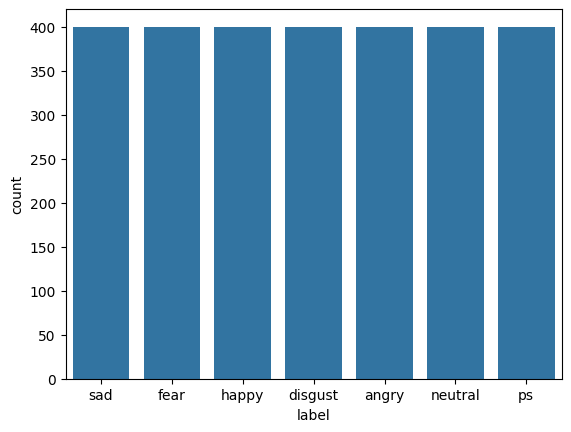

In [15]:
sns.countplot(data=df, x='label')

In [16]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,sad,NaN
1,/content/tess toronto emotional speech set dat...,sad,NaN
2,/content/tess toronto emotional speech set dat...,sad,NaN
3,/content/tess toronto emotional speech set dat...,sad,NaN
4,/content/tess toronto emotional speech set dat...,sad,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,ps,NaN
2796,/content/tess toronto emotional speech set dat...,ps,NaN
2797,/content/tess toronto emotional speech set dat...,ps,NaN
2798,/content/tess toronto emotional speech set dat...,ps,NaN


In [17]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [19]:
df.drop('label_count', axis=1, inplace = True)

In [20]:
print(df.head())
print(df['label'].unique())


                                              speech label
0  /content/tess toronto emotional speech set dat...   sad
1  /content/tess toronto emotional speech set dat...   sad
2  /content/tess toronto emotional speech set dat...   sad
3  /content/tess toronto emotional speech set dat...   sad
4  /content/tess toronto emotional speech set dat...   sad
['sad' 'fear' 'happy' 'disgust' 'angry' 'neutral' 'ps']


In [21]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_name_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_rag_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_perch_sad.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_kite_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_cab_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_tape_ps.wav'],
      dtype=object)

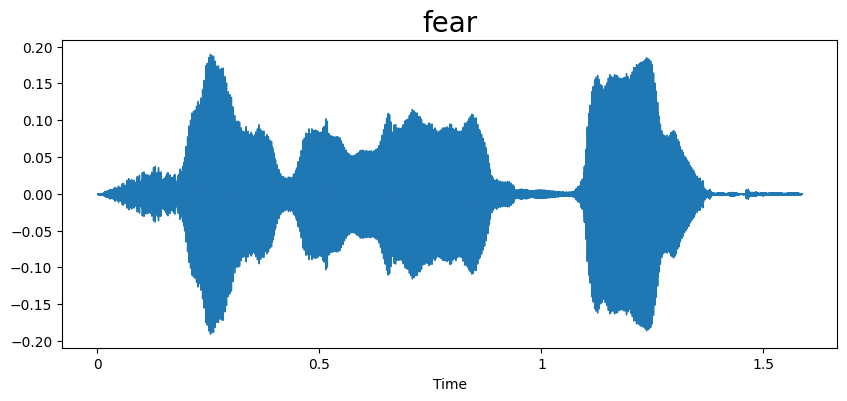

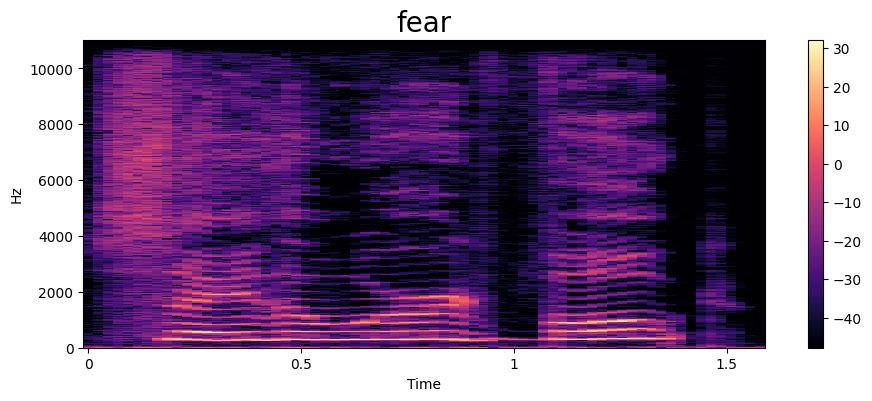

In [22]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


In [23]:
emotion = 'angry'

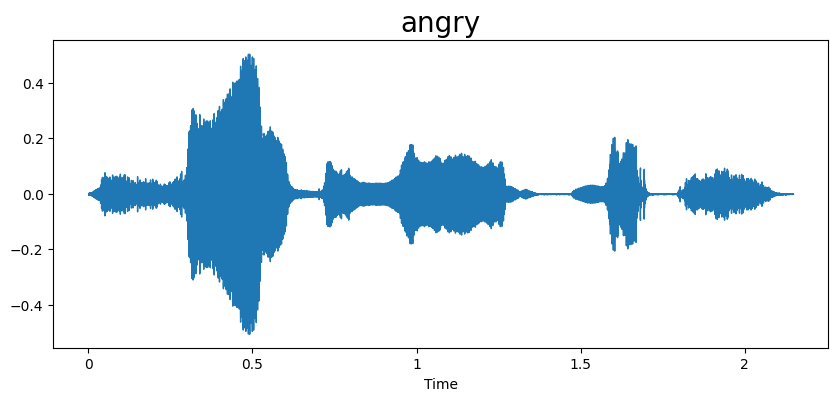

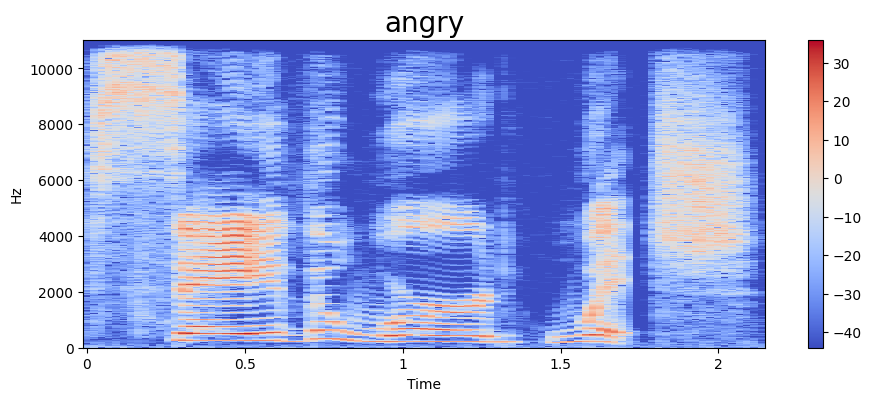

In [24]:
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


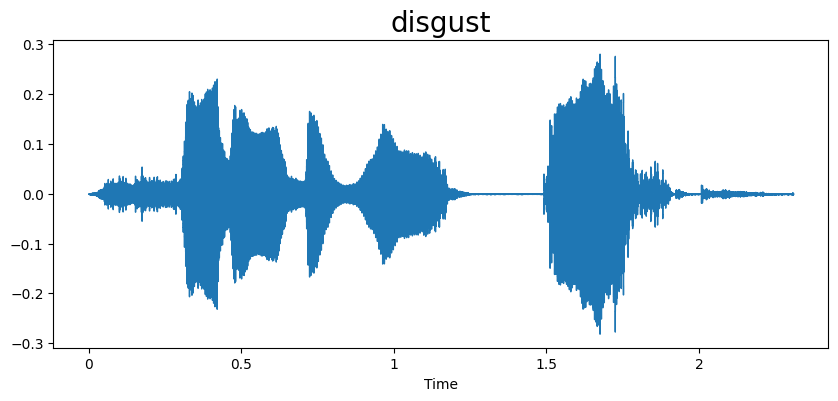

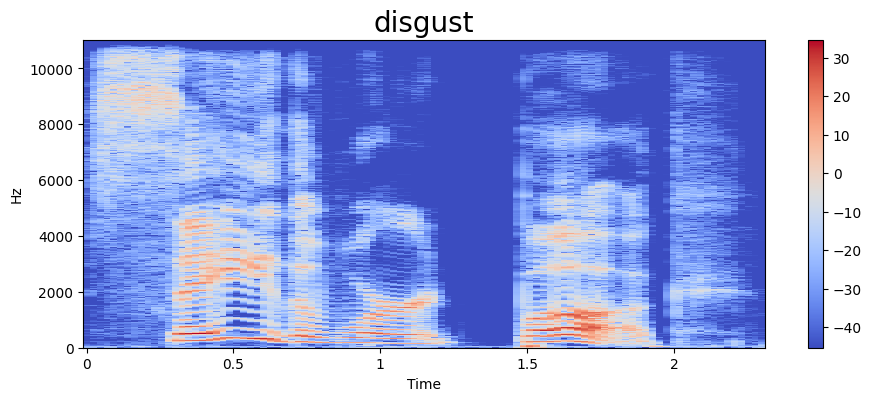

In [25]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


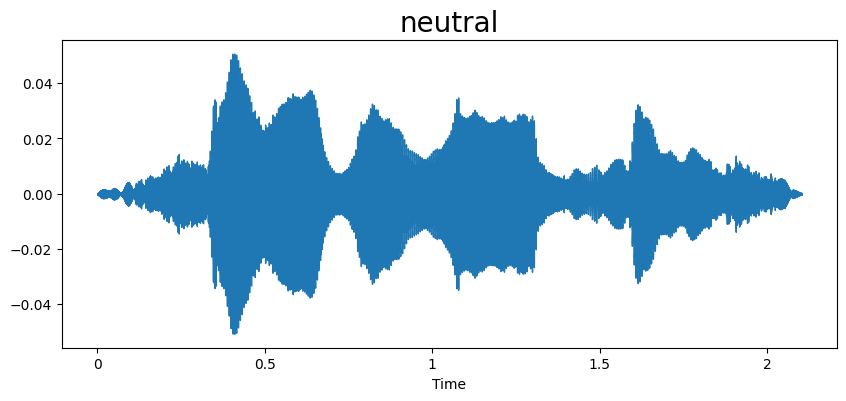

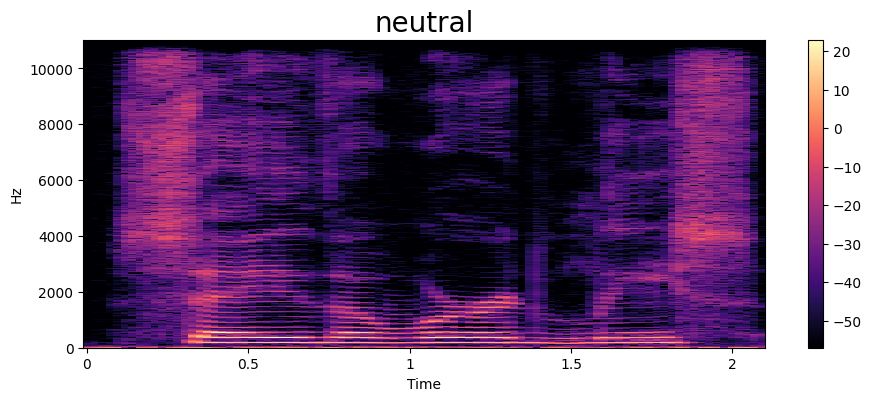

In [26]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


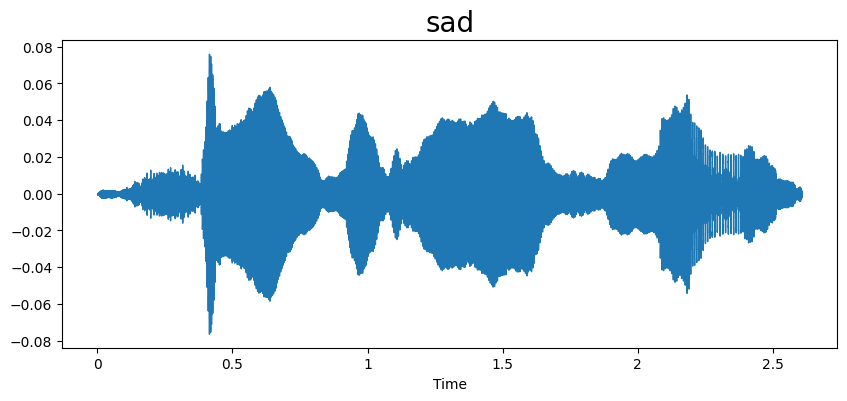

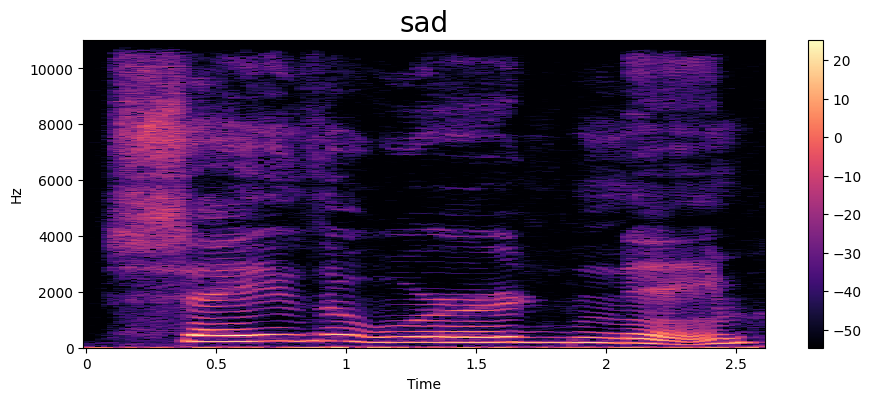

In [27]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


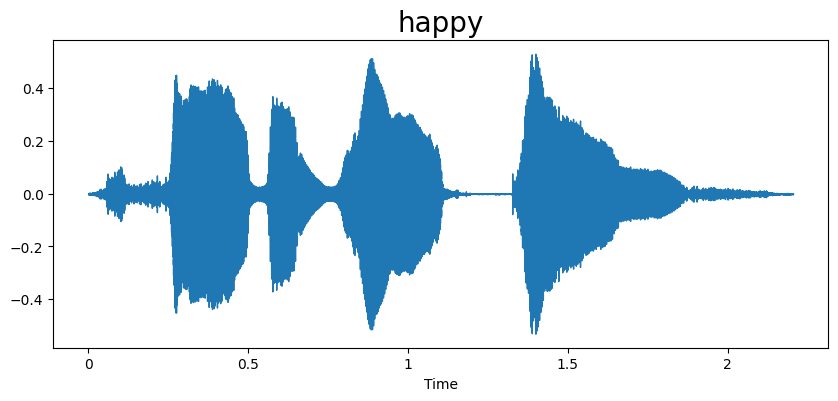

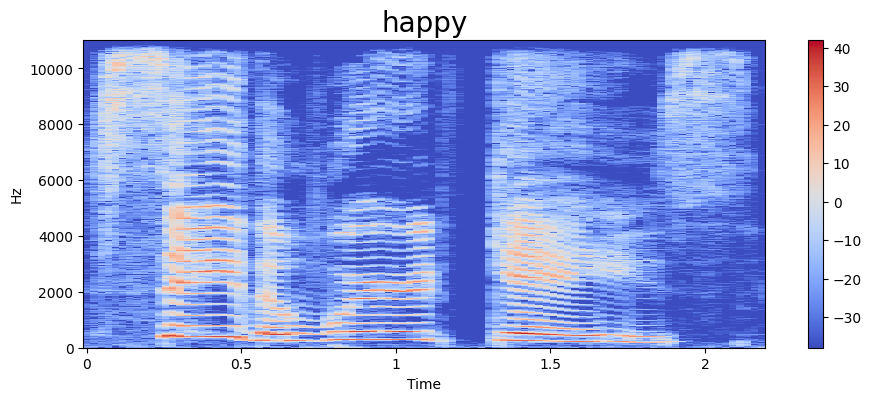

In [28]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


Feature Extraction:

In [29]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [30]:
extract_mfcc(df['speech'][0])

array([-5.28461121e+02,  1.05532524e+02,  3.36951256e+01,  1.92747517e+01,
        2.64250469e+01,  6.69489050e+00, -7.71053171e+00, -7.96135378e+00,
       -1.92235146e+01, -1.46670318e+00, -1.49978819e+01, -6.07192707e+00,
       -8.80677700e+00,  1.85927585e-01,  2.99492812e+00, -1.16085374e+00,
        2.00999284e+00,  3.71909976e+00,  1.77838790e+00, -9.77266026e+00,
        3.93785286e+00, -7.94986010e+00, -5.16587114e+00, -6.02338731e-01,
       -1.09397478e+01,  3.42276263e+00, -1.50507879e+00,  5.47776318e+00,
        1.80570650e+00,  8.28636551e+00,  4.96863747e+00,  8.17939377e+00,
        6.43163264e-01,  1.13969660e+01,  1.51086721e+01,  1.64546185e+01,
        2.06323547e+01,  1.67987442e+01,  4.09857035e+00,  9.22925091e+00],
      dtype=float32)

In [31]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [32]:
X_mfcc

0       [-528.4611, 105.532524, 33.695126, 19.274752, ...
1       [-539.1625, 114.6068, 23.520031, 0.5449551, 20...
2       [-570.2224, 92.712234, 22.172085, 9.464764, 21...
3       [-534.8281, 91.37029, 28.718672, 22.603132, 25...
4       [-513.6124, 74.71477, 27.108187, 11.283358, 18...
                              ...                        
2795    [-538.6113, 114.719185, -4.6398454, -9.403332,...
2796    [-417.34192, 100.31621, -3.9206097, -20.78925,...
2797    [-499.06842, 101.775024, -0.63634694, 5.332288...
2798    [-436.7044, 111.79512, -4.3364267, -11.879581,...
2799    [-454.70374, 90.11405, 11.659679, 4.93019, 16....
Name: speech, Length: 2800, dtype: object

In [33]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(2800, 40)

In [34]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [36]:
y = y.toarray()

In [37]:
y.shape

(2800, 7)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Create the LSTM Model

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [40]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)


Epoch 1/30
35/35 [==============================] - 10s 210ms/step - loss: 1.6585 - accuracy: 0.3491 - val_loss: 1.0379 - val_accuracy: 0.6107
Epoch 2/30
35/35 [==============================] - 6s 181ms/step - loss: 1.0869 - accuracy: 0.5696 - val_loss: 0.6288 - val_accuracy: 0.7661
Epoch 3/30
35/35 [==============================] - 6s 166ms/step - loss: 0.7938 - accuracy: 0.7054 - val_loss: 0.3515 - val_accuracy: 0.8804
Epoch 4/30
35/35 [==============================] - 7s 210ms/step - loss: 0.5748 - accuracy: 0.8076 - val_loss: 0.4139 - val_accuracy: 0.8429
Epoch 5/30
35/35 [==============================] - 7s 187ms/step - loss: 0.4251 - accuracy: 0.8621 - val_loss: 0.1664 - val_accuracy: 0.9429
Epoch 6/30
35/35 [==============================] - 8s 216ms/step - loss: 0.3237 - accuracy: 0.9045 - val_loss: 0.1209 - val_accuracy: 0.9536
Epoch 7/30
35/35 [==============================] - 6s 166ms/step - loss: 0.2779 - accuracy: 0.9219 - val_loss: 0.1210 - val_accuracy: 0.9696
Epoch

Plot the results

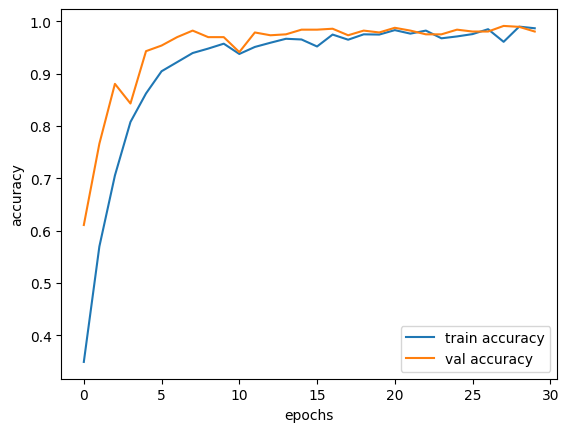

In [41]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


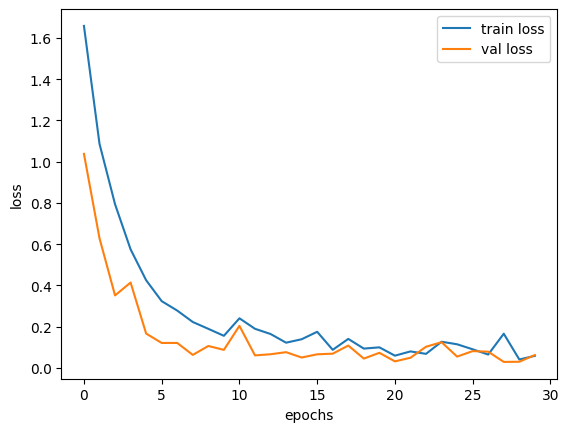

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [43]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


18/18 [==============================] - 1s 35ms/step


In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[66  0  2  2  0  0  0]
 [ 2 74  0  1  0  1  2]
 [ 0  0 79  0  0  0  0]
 [ 0  0  0 99  0  0  0]
 [ 0  0  0  0 88  0  0]
 [ 1  0  0  0  0 69  0]
 [ 0  0  0  0  0  0 74]]


In [46]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

       angry       0.96      0.94      0.95        70
     disgust       1.00      0.93      0.96        80
        fear       0.98      1.00      0.99        79
       happy       0.97      1.00      0.99        99
     neutral       1.00      1.00      1.00        88
          ps       0.99      0.99      0.99        70
         sad       0.97      1.00      0.99        74

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



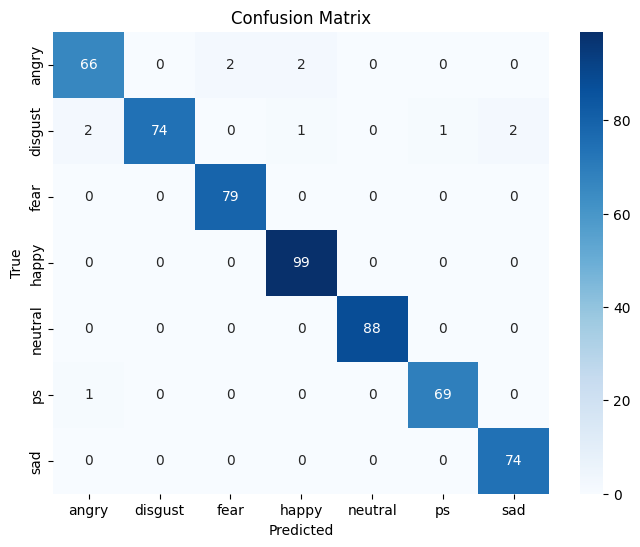

In [47]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
